# MMOCR Tutorial

Welcome to MMOCR! This is the official colab tutorial for using MMOCR. In this tutorial, you will learn how to

- Install MMOCR from source
- Perform inference with
  - a pretrained text recognizer
  - a pretrained text detector
  - pretrained recognizer and detector
  - pretrained Key Information Extraction (KIE) model
- Evaluate a text detection model on an acadmic dataset
- Train a text recognizer with a toy dataset

Let's start!

## Install MMOCR from source

Installing MMOCR is straightforward. We recommend users to install MMOCR from source as any local code changes on MMOCR can take effect immediately, which is needed for research & developement purpose. Refer to [documentation](https://mmocr.readthedocs.io/en/dev-1.x/get_started/install.html) for more information.

### Install Dependencies using MIM

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv>=2.0.0rc1'
!mim install 'mmdet>=3.0.0rc0'

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.5.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.3/452.3 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 21.4 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.5.0/index.html
  Using cached mmcv-2.2.0.tar.gz (479 kB)
  Preparing metadata (setup.py) ... done


### Install MMOCR

In [ ]:
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -v -e .
# "-v" increases pip's verbosity.
# "-e" means installing the project in editable mode,
# That is, any local modifications on the code will take effect immediately.

Cloning into 'mmocr'...
remote: Enumerating objects: 16394, done.
remote: Counting objects: 100% (303/303), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 16394 (delta 107), reused 204 (delta 71), pack-reused 16091 (from 1)
Receiving objects: 100% (16394/16394), 16.24 MiB | 13.65 MiB/s, done.
Resolving deltas: 100% (10775/10775), done.
/content/mmocr
Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Obtaining file:///content/mmocr
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-3t8icioh/mmocr.egg-info
  writing /tmp/pip-pip-egg-info-3t8icioh/mmocr.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-3t8icioh/mmocr.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-3t8icioh/mmocr.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-3t8icioh/mmocr.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-3t8icioh/

## Inference

MMOCR has made inference easy by providing a variety of `Inferencer`s. In this section, we will focus on the usage of `MMOCRInferencer`. However, if you want to learn more about other `Inferencer`s, you can refer to the [documentation](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/inference.html) which provides detailed descriptions.

### Perform Inference with a Pretrained Text Recognizer

We now demonstrate how to inference on a demo text recognition image with a pretrained text recognizer. SVTR text recognizer is used for this demo, whose checkpoint can be found in the [official documentation](https://mmocr.readthedocs.io/en/dev-1.x/textrecog_models.html#svtr). But you don't need to download it manually -- Our Inferencer script handles these cumbersome setup steps for you!

Run the following command and you will get the inference result from return value as well as files, which will be  visualized in the end.

In [ ]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(rec='svtr-small')
result = infer('demo/demo_text_recog.jpg', save_vis=True, return_vis=True)
print(result['predictions'])

ModuleNotFoundError: No module named 'mmcv'

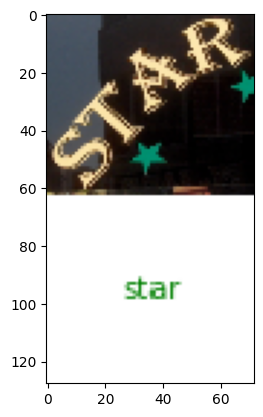

In [ ]:
# Visualize the return value
import matplotlib.pyplot as plt
plt.imshow(result['visualization'][0])
plt.show()

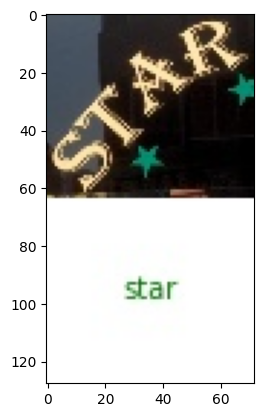

In [ ]:
# Visualize the saved image
import mmcv
predicted_img = mmcv.imread('results/vis/demo_text_recog.jpg')
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

### Perform Inference with a Pretrained Text Detector

Next, we perform inference with a pretrained DBNet++ text detector and visualize the bounding box results for the demo text detection image.

In [ ]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(det='dbnetpp')
result = infer('demo/demo_text_det.jpg', return_vis=True)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth


Downloading: "https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth" to /root/.cache/torch/hub/checkpoints/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth


Output()

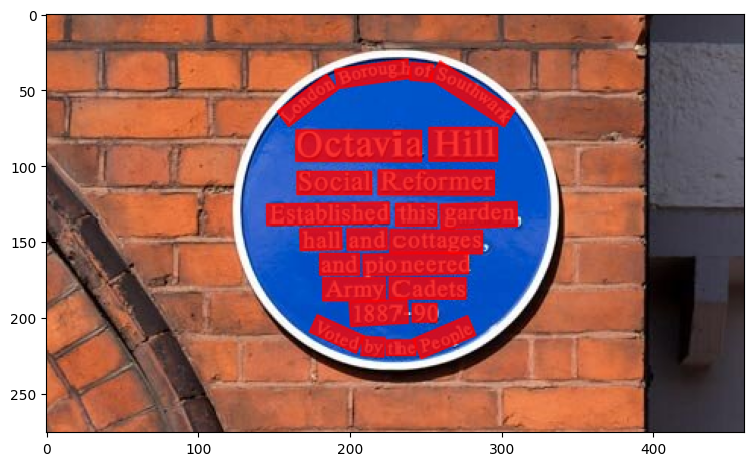

In [ ]:
# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.show()

### Perform end-to-end OCR with pretrained recognizer and detector

We can  any text detector and recognizer into a pipeline that forms a standard OCR pipeline. Now we build our own OCR pipeline with DBNet++ and SVTR and apply it to `demo/demo_text_ocr.jpg`.

In [ ]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(det='dbnetpp', rec='svtr-small')
result = infer('demo/demo_text_ocr.jpg', return_vis=True)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/svtr/svtr-small_20e_st_mj/svtr-small_20e_st_mj-35d800d6.pth


Output()

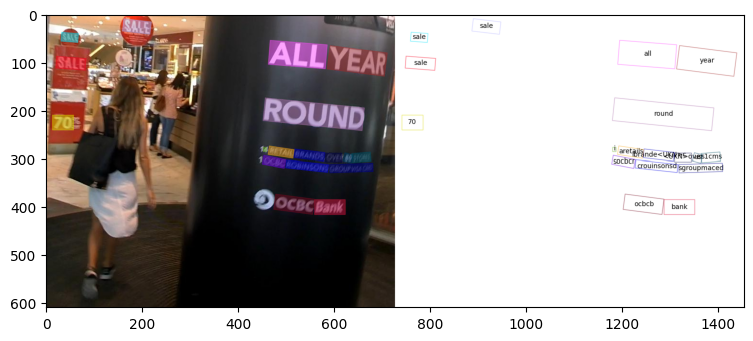

In [ ]:
# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.show()

### Combine OCR with Downstream Tasks

MMOCR also supports downstream tasks of OCR, such as key information extraction (KIE). We can even add a KIE model, SDMG-R, to the pipeline applied to `demo/demo_kie.jpeg` and visualize its prediction.


In [ ]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(det='dbnetpp', rec='svtr-small', kie='SDMGR')
result = infer('demo/demo_kie.jpeg', save_vis=True)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/svtr/svtr-small_20e_st_mj/svtr-small_20e_st_mj-35d800d6.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt/sdmgr_unet16_60e_wildreceipt_20220825_151648-22419f37.pth


Downloading: "https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt/sdmgr_unet16_60e_wildreceipt_20220825_151648-22419f37.pth" to /root/.cache/torch/hub/checkpoints/sdmgr_unet16_60e_wildreceipt_20220825_151648-22419f37.pth


Output()

The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



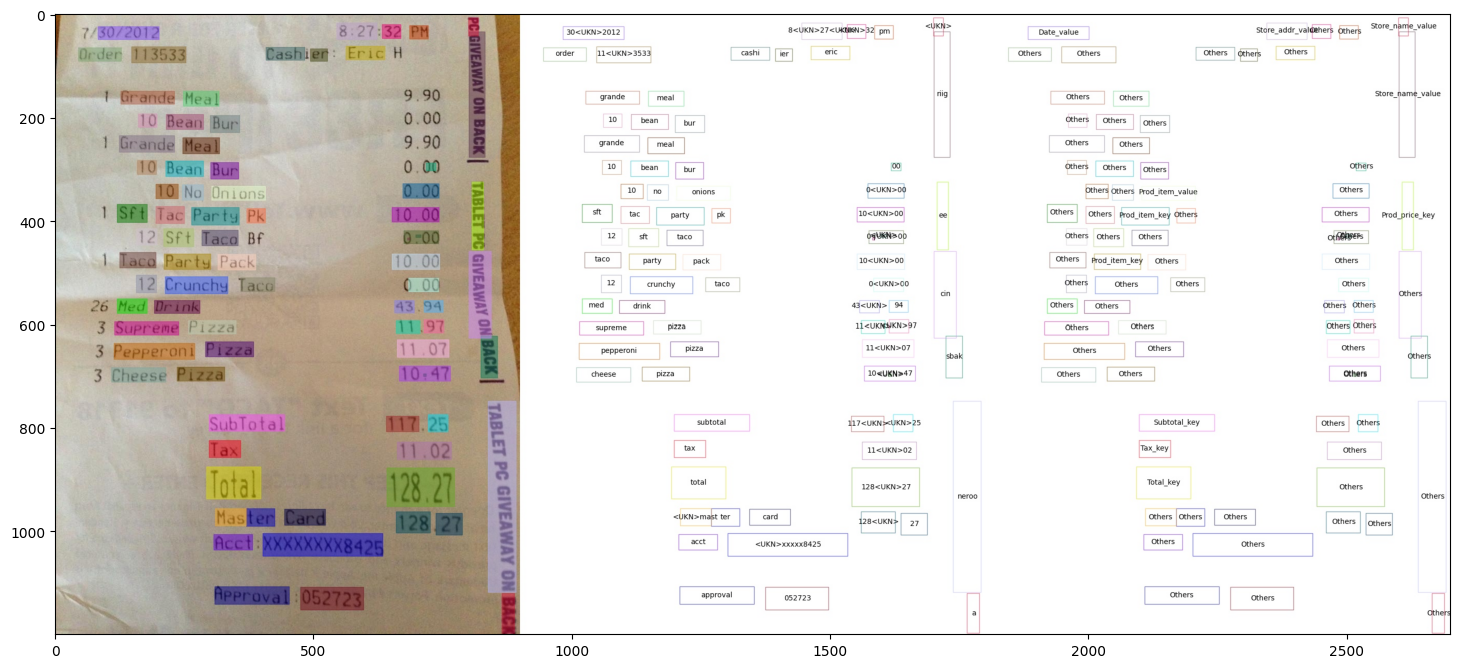

In [ ]:
# Visualize the results
import mmcv
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('results/vis/demo_kie.jpg')
plt.figure(figsize=(18, 32))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Training SAR on a Toy Dataset

We now demonstrate how to train a recognizer on a provided dataset in a Python interpreter. Another common practice is to train a model from CLI (command line interface), as illustrated [here](https://mmocr.readthedocs.io/en/dev-1.x/get_started/quick_run.html#training).

Since training a full academic dataset is time consuming (usually takes about several hours or even days), we will train on the toy dataset for the SAR text recognition model and visualize the predictions. Text detection and other downstream tasks such as KIE follow similar procedures.

Training a model usually consists of the following steps:
1. Convert the dataset into [formats supported by MMOCR](https://mmocr.readthedocs.io/en/dev-1.x/basic_concepts/datasets.html). It should never be a concern if the dataset is obtained from Dataset Preparer. Otherwise, you will need to manually download and prepare the dataset following the [guide](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/recog.html), or even have to write a custom conversion script if your dataset is not on the list.
2. Modify the config for training.
3. Train the model.

In this example, we will use an off-the-shelf toy dataset to train SAR, and the first step will be skipped. The full demonstration of the first step can be found at the next section: Evaluating SAR on academic testsets.

### Visualize the Toy Dataset

We first get a sense of what the toy dataset looks like by visualizing one of the images and labels. The toy dataset consisits of ten images as well as annotation files in both json and lmdb format, and we only use json annotations in this tutorial.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -r /content/mmocr/tests/data/rec_toy_dataset/imgs

rm: cannot remove '/content/mmocr/tests/data/rec_toy_dataset/imgs': No such file or directory


In [ ]:
# import os
# import shutil
# from tqdm import tqdm

# def copy_jpg_images(source_folder, destination_folder):
#     # Create the destination folder if it doesn't exist
#     if not os.path.exists(destination_folder):
#         os.makedirs(destination_folder)

#     # Get a list of all files in the source folder
#     files = os.listdir(source_folder)

#     # Filter out non-JPG files
#     jpg_files = [file for file in files if file.lower().endswith(".jpg")]

#     # Set up the progress bar
#     progress_bar = tqdm(total=len(jpg_files), unit="image")

#     # Iterate over each JPG file
#     for file in jpg_files:
#         # Construct the source and destination paths
#         source_path = os.path.join(source_folder, file)
#         destination_path = os.path.join(destination_folder, file)

#         # Copy the file to the destination folder
#         shutil.copy(source_path, destination_path)

#         # Update the progress bar
#         progress_bar.update(1)

#     # Close the progress bar
#     progress_bar.close()

#     print("JPG images copied successfully!")

# # Usage example
# source_folder = "/content/drive/MyDrive/nagri/SNdataset/data"
# destination_folder = "/content/mmocr/tests/data/rec_toy_dataset/imgs"

# copy_jpg_images(source_folder, destination_folder)


In [ ]:
# import the necessary packages
import numpy as np
from google.colab.patches import cv2_imshow
import imutils
import cv2
import os

In [ ]:
def preprocess(input_path):
  image = cv2.imread(input_path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # threshold the image using Otsu's thresholding method
  thresh = cv2.threshold(gray, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

  # apply a distance transform which calculates the distance to the
  # closest zero pixel for each pixel in the input image
  dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
  # normalize the distance transform such that the distances lie in
  # the range [0, 1] and then convert the distance transform back to
  # an unsigned 8-bit integer in the range [0, 255]
  dist = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
  dist = (dist * 255).astype("uint8")

  # threshold the distance transform using Otsu's method
  dist = cv2.threshold(dist, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

  # apply an "opening" morphological operation to disconnect components
  # in the image
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
  opening = cv2.morphologyEx(dist, cv2.MORPH_OPEN, kernel)

  # find contours in the opening image, then initialize the list of
  # contours which belong to actual characters that we will be OCR'ing
  cnts = cv2.findContours(opening.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  chars = []
  # loop over the contours
  for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # check if contour is at least 35px wide and 100px tall, and if
    # so, consider the contour a digit
    if w >= 5 and h >= 5:
      chars.append(c)
  if (len(chars)!=0):
    # compute the convex hull of the characters
    chars = np.vstack([chars[i] for i in range(0, len(chars))])
    hull = cv2.convexHull(chars)
    # allocate memory for the convex hull mask, draw the convex hull on
    # the image, and then enlarge it via a dilation
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [hull], -1, 255, -1)
    mask = cv2.dilate(mask, None, iterations=2)

    # take the bitwise of the opening image and the mask to reveal *just*
    # the characters in the image
    final = cv2.bitwise_and(opening, opening, mask=mask)
    #cv2_imshow(final)
    return final


In [ ]:
source_folder = "/content/drive/MyDrive/nagri/SNdataset/data"
destination_folder = "/content/mmocr/tests/data/rec_toy_dataset/imgs"

# Ensure the output folder exists
os.makedirs(destination_folder, exist_ok=True)

# Iterate over each image file in the input folder
for filename in os.listdir(source_folder):
    # Construct the input and output file paths
    input_path = os.path.join(source_folder, filename)
    output_path = os.path.join(destination_folder, filename)

    # Load the image
    final = preprocess(input_path)



    if final is not None:
      cv2.imwrite(output_path, final)
      print(f"Processed and saved: {filename}")
    else:
      print(f"Failed to process: {filename}")

print("Preprocessing complete!")

Streaming output truncated to the last 5000 lines.
Processed and saved: kori-952(1).jpg
Processed and saved: kori-594.jpg
Processed and saved: kori-853.jpg
Processed and saved: kori-489.jpg
Processed and saved: kori-615(b).jpg
Processed and saved: kori-971.jpg
Processed and saved: kori-758.jpg
Processed and saved: kori-614.jpg
Processed and saved: kori-447.jpg
Processed and saved: kori-539.jpg
Processed and saved: kori-68.jpg
Processed and saved: kori-698.jpg
Processed and saved: kori-666.jpg
Processed and saved: kori-850(c).jpg
Processed and saved: kori-949.jpg
Processed and saved: kori-952(2).jpg
Processed and saved: kori-726.jpg
Processed and saved: kori-475.jpg
Processed and saved: kori-417.jpg
Processed and saved: kori-988.jpg
Processed and saved: kori-632.jpg
Processed and saved: kori-538.jpg
Processed and saved: kori-907.jpg
Processed and saved: kori-837.jpg
Processed and saved: kori-73.jpg
Processed and saved: kori-400.jpg
Processed and saved: kori-966.jpg
Processed and saved: 

In [ ]:
import csv
import json

csv_file = '/content/drive/MyDrive/nagri/SNdataset/clean_nagri.csv'
json_file = 'tests/data/rec_toy_dataset/labels.json'

data_list = []

with open(csv_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if(row['fold']=="train"):
          data_list.append({
              "instances": [{
                  "text": row['SN']
              }],
              "img_path": row['filename']
          })

json_data = {
    "metainfo": {
        "dataset_type": "TextRecogDataset",
        "task_name": "textrecog"
    },
    "data_list": data_list
}

with open(json_file, 'w') as file:
    json.dump(json_data, file, indent=4)

print(f"Conversion completed! JSON file saved as {json_file}")


Conversion completed! JSON file saved as tests/data/rec_toy_dataset/labels.json


In [ ]:
vocab    = ["!","\"","#","$","%","&","'","(",")","*","+",",","-",".","/",":",";","<","=",">","?","।",
            "০","১","২","৩","৪","৫","৬","৭","৮","৯",
            "ꠀ","ꠁ","ꠂ","ꠃ","ꠄ","ꠅ","꠆","ꠇ","ꠈ","ꠉ","ꠊ","ꠋ","ꠌ","ꠍ","ꠎ","ꠏ","ꠐ","ꠑ","ꠒ","ꠓ","ꠔ","ꠕ","ꠖ",
            "ꠗ","ꠘ","ꠙ","ꠚ","ꠛ","ꠜ","ꠝ","ꠞ","ꠟ","ꠠ","ꠡ","ꠢ","ꠣ","ꠤ","ꠥ","ꠦ","ꠧ","꠬"]
def create_character_file(characters, filename):
    with open(filename, 'w') as file:
        for character in characters:
            file.write(character + '\n')


file_name = '/content/mmocr/dicts/nagri.txt'

create_character_file(vocab, file_name)

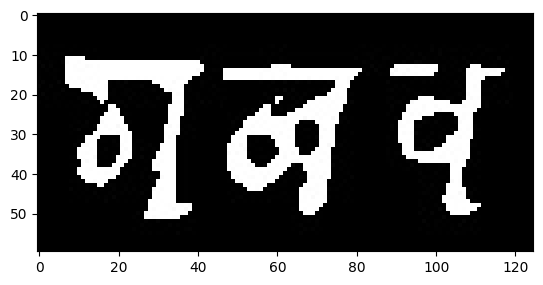

In [ ]:
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('tests/data/rec_toy_dataset/imgs/1.jpg')
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
# Inspect the labels of the annootation file
!cat tests/data/rec_toy_dataset/labels.json

{
    "metainfo": {
        "dataset_type": "TextRecogDataset",
        "task_name": "textrecog"
    },
    "data_list": [
        {
            "instances": [
                {
                    "text": "\ua816\ua825"
                }
            ],
            "img_path": "kori-190.jpg"
        },
        {
            "instances": [
                {
                    "text": "\ua80e\ua814"
                }
            ],
            "img_path": "2101.jpg"
        },
        {
            "instances": [
                {
                    "text": "\ua805\ua80e\ua825\ua81e"
                }
            ],
            "img_path": "2907.jpg"
        },
        {
            "instances": [
                {
                    "text": "\ua81f\ua807"
                }
            ],
            "img_path": "kori-1021.jpg"
        },
        {
            "instances": [
                {
                    "text": "\ua805\ua817\ua824\ua807\ua823\ua81e\ua824"
                }
  

### Load Config

First we will load the toy config for SAR.


In [ ]:
from mmengine import Config
# Load the config
cfg = Config.fromfile('configs/textrecog/sar/sar_resnet31_parallel-decoder_5e_toy.py')


In order to train SAR to its best state on toy dataset, we need to modify some hyperparameters in the config to accomodate some of the settings of colab.
For more explanation about the config and its fields, please refer to [documentation](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/config.html).

In [ ]:
# Specify the work dir
cfg.work_dir = '/content/drive/MyDrive/nagri/checkpoints'
# Configure the batch size, learning rate, and maximum epochs
cfg.optim_wrapper.optimizer.lr = 1e-3
cfg.train_dataloader.batch_size = 16
cfg.train_cfg.max_epochs = 100
# Save checkpoint every 10 epochs
cfg.default_hooks.checkpoint.interval = 10
cfg.model.decoder.dictionary.dict_file = 'dicts/nagri.txt'
# We don't need any learning rate scheduler for a toy dataset
# thus clear parameter scheduler here
cfg.param_scheduler = None
cfg.dictionary.dict_file = 'dicts/nagri.txt'
# Set seed thus the results are more reproducible
cfg.randomness = dict(seed=0)

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
toy_data_root = 'tests/data/rec_toy_dataset/'
toy_rec_train = dict(
    type='OCRDataset',
    data_root='tests/data/rec_toy_dataset/',
    data_prefix=dict(img_path='imgs/'),
    ann_file='labels.json',
    pipeline=None,
    test_mode=False)
toy_rec_test = dict(
    type='OCRDataset',
    data_root='tests/data/rec_toy_dataset/',
    data_prefix=dict(img_path='imgs/'),
    ann_file='labels.json',
    pipeline=None,
    test_mode=True)
default_scope = 'mmocr'
env_cfg = dict(
    cudnn_benchmark=False,
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0),
    dist_cfg=dict(backend='nccl'))
randomness = dict(seed=0)
default_hooks = dict(
    timer=dict(type='IterTimerHook'),
    logger=dict(type='LoggerHook', interval=1),
    param_scheduler=dict(type='ParamSchedulerHook'),
    checkpoint=dict(type='CheckpointHook', interval=10),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    sync_buffer=dict(type='SyncBuffersHook'),
    visualization=dict(
        type='Visualiz

### Train the SAR Text Recognizer
Let's train the SAR text recognizer on the toy dataset for 10 epochs.

In [ ]:
from mmengine.runner import Runner
import time

# Optionally, give visualizer a unique name to avoid dupliate instance being
# created in multiple runs
cfg.visualizer.name = f'{time.localtime()}'
cfg.visualizer.font_properties="/content/drive/MyDrive/nagri/Surma-Regular.ttf"
runner = Runner.from_cfg(cfg)
runner.train()

06/18 07:20:01 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/18 07:20:08 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/18 07:20:08 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
06/18 07:20:08 - mmengine - INFO - Checkpoints will be saved to /content/drive/MyDrive/nagri/checkpoints.


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Streaming output truncated to the last 5000 lines.
06/18 07:35:08 - mmengine - INFO - Epoch(val)   [3][1441/2873]    eta: 0:02:29  time: 0.1055  data_time: 0.0087  memory: 906  
06/18 07:35:08 - mmengine - INFO - Epoch(val)   [3][1442/2873]    eta: 0:02:29  time: 0.1055  data_time: 0.0087  memory: 906  
06/18 07:35:08 - mmengine - INFO - Epoch(val)   [3][1443/2873]    eta: 0:02:29  time: 0.1056  data_time: 0.0088  memory: 906  
06/18 07:35:09 - mmengine - INFO - Epoch(val)   [3][1444/2873]    eta: 0:02:29  time: 0.1055  data_time: 0.0088  memory: 906  
06/18 07:35:09 - mmengine - INFO - Epoch(val)   [3][1445/2873]    eta: 0:02:29  time: 0.1056  data_time: 0.0089  memory: 906  
06/18 07:35:09 - mmengine - INFO - Epoch(val)   [3][1446/2873]    eta: 0:02:29  time: 0.1064  data_time: 0.0096  memory: 906  
06/18 07:35:09 - mmengine - INFO - Epoch(val)   [3][1447/2873]    eta: 0:02:28  time: 0.1056  data_time: 0.0087  memory: 906  
06/18 07:35:09 - mmengine - INFO - Epoch(val)   [3][1448/287

KeyboardInterrupt: ignored

### Perform inference and Visualize the Predictions

We can test the model through [Infernecer](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/inference.html), then print out and visualize its return values. Inferencer can also accepts many more types of inputs, just feel free to play around with it.

Loads checkpoint by local backend from path: /content/drive/MyDrive/nagri/checkpoints/epoch_50.pth


Output()

result: [{'text': 'ꠇꠣꠝꠣꠝ', 'scores': 0.9695366501808167}]


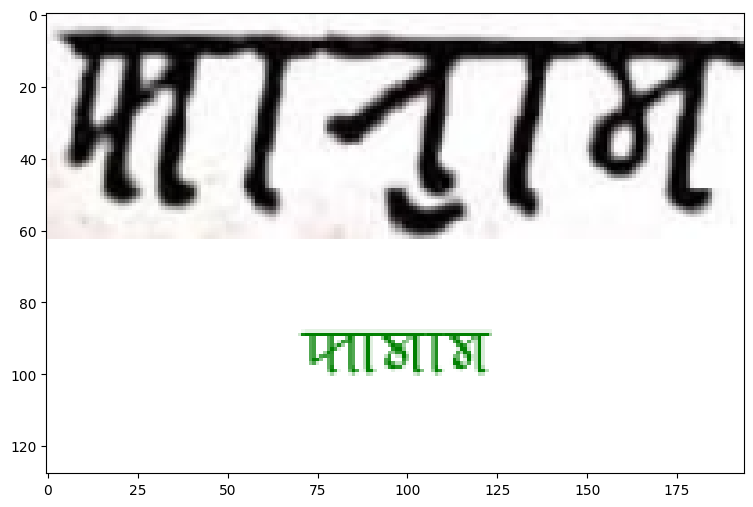

In [ ]:
import matplotlib.pyplot as plt
import time
from mmocr.apis import TextRecInferencer
from mmengine import Config
img = 'tests/data/rec_toy_dataset/imgs/1800.jpg'
#checkpoint = "work_dirs/sar_resnet31_parallel-decoder_5e_toy/epoch_5.pth"
cfg_file = "configs/textrecog/sar/sar_resnet31_parallel-decoder_5e_toy.py"
checkpoint = "/content/drive/MyDrive/nagri/checkpoints/epoch_50.pth"
# Load the config
cfg = Config.fromfile(cfg_file)



cfg.model.decoder.dictionary.dict_file = 'dicts/nagri.txt'
cfg.visualizer.name = f'{time.localtime()}'
cfg.visualizer.font_properties="/content/drive/MyDrive/nagri/Surma-Regular.ttf"
infer = TextRecInferencer(cfg, checkpoint)
result = infer(img, return_vis=True)

print(f'result: {result["predictions"]}' )

plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.show()

In [ ]:
!cp /content/drive/MyDrive/nagri/checkpoints/epoch_50.pth /content/mmocr/work_dirs/sar_resnet31_parallel-decoder_5e_toy/

In [ ]:
!cp work_dirs/sar_resnet31_parallel-decoder_5e_toy/epoch_5.pth /content/drive/MyDrive/nagri

## Evaluating SAR

This section provides guidance on how to evaluate a model using with pretrained weights in a Python interpreter. Apart from such a practice, another common practice is to test a model from CLI (command line interface), as illustrated [here](https://mmocr.readthedocs.io/en/dev-1.x/get_started/quick_run.html#testing).

Typically, the evaluation process involves several steps:

1. Convert the dataset into [formats supported by MMOCR](https://mmocr.readthedocs.io/en/dev-1.x/basic_concepts/datasets.html). It should not be a concern if the dataset is obtained from [Dataset Preparer](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/dataset_preparer.html), which can download, extract and convert the dataset into a MMOCR-ready form with a single line of command. Otherwise, you will need to manually download and prepare the dataset following the [guide](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/det.html), or even have to write a custom conversion script if your dataset is not on the list.
2. Modify the config for testing.
3. Test the model.

Now we will demonstrate how to test a model on different datasets.


### Toy Dataset

With the checkpoint we obtained from the last section, we can evaluate it on the toy dataset again. Some more explanataions about the evaulation metrics are available [here](https://mmocr.readthedocs.io/en/dev-1.x/basic_concepts/evaluation.html).

In [ ]:
import csv
import json

csv_file = '/content/drive/MyDrive/nagri/SNdataset/clean_nagri.csv'
json_file = 'tests/data/rec_toy_dataset/labels.json'

data_list = []

with open(csv_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if(row['fold']=="test"):
          data_list.append({
              "instances": [{
                  "text": row['SN']
              }],
              "img_path": row['filename']
          })

json_data = {
    "metainfo": {
        "dataset_type": "TextRecogDataset",
        "task_name": "textrecog"
    },
    "data_list": data_list
}

with open(json_file, 'w') as file:
    json.dump(json_data, file, indent=4)

print(f"Conversion completed! JSON file saved as {json_file}")


Conversion completed! JSON file saved as tests/data/rec_toy_dataset/labels.json


In [ ]:
from mmengine.runner import Runner
import time

# The location of pretrained weight
cfg['load_from'] = 'work_dirs/sar_resnet31_parallel-decoder_5e_toy/epoch_50.pth'

# Optionally, give visualizer a unique name to avoid dupliate instance being
# created in multiple runs
cfg.visualizer.name = f'{time.localtime()}'

runner = Runner.from_cfg(cfg)
runner.test()

06/08 09:50:59 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Loads checkpoint by local backend from path: work_dirs/sar_resnet31_parallel-decoder_5e_toy/epoch_50.pth
06/08 09:51:07 - mmengine - INFO - Load checkpoint from work_dirs/sar_resnet31_parallel-decoder_5e_toy/epoch_50.pth


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/08 09:51:08 - mmengine - INFO - Epoch(test) [   1/1249]    eta: 0:09:30  time: 0.4572  data_time: 0.2913  memory: 1055  
06/08 09:51:08 - mmengine - INFO - Epoch(test) [   2/1249]    eta: 0:06:02  time: 0.2904  data_time: 0.1512  memory: 578  
06/08 09:51:08 - mmengine - INFO - Epoch(test) [   3/1249]    eta: 0:04:47  time: 0.2308  data_time: 0.1034  memory: 578  
06/08 09:51:08 - mmengine - INFO - Epoch(test) [   4/1249]    eta: 0:04:07  time: 0.1992  data_time: 0.0789  memory: 578  
06/08 09:51:08 - mmengine - INFO - Epoch(test) [   5/1249]    eta: 0:03:43  time: 0.1799  data_time: 0.0638  memory: 578  
06/08 09:51:08 - mmengine - INFO - Epoch(test) [   6/1249]    eta: 0:03:28  time: 0.1675  data_time: 0.0544  memory: 578  
06/08 09:51:08 - mmengine - INFO - Epoch(test) [   7/1249]    eta: 0:03:17  time: 0.1589  data_time: 0.0478  memory: 578  
06/08 09:51:08 - mmengine - INFO - Epoch(test) [   8/1249]    eta: 0:03:09  time: 0.1524  data_time: 0.0428  memory: 578  
06/08 09:51:09 

OrderedDict([('Toy/recog/word_acc', 0.6669),
             ('Toy/recog/word_acc_ignore_case', 0.6669),
             ('Toy/recog/word_acc_ignore_case_symbol', 0.9976),
             ('Toy/recog/char_recall', 0.0),
             ('Toy/recog/char_precision', 0.0)])

It's also possible to evaluate with a stronger and more generalized pretrained weight, which were trained on larger datasets and achieved quite competitve acadmical performance, though it may not defeat the previous checkpoint overfitted to the toy dataset. ([readme](https://mmocr.readthedocs.io/en/dev-1.x/textrecog_models.html#sar))


In [ ]:
# The location of pretrained weight
cfg['load_from'] = 'https://download.openmmlab.com/mmocr/textrecog/sar/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real_20220915_171910-04eb4e75.pth'
cfg.visualizer.name = f'{time.localtime()}'
runner = Runner.from_cfg(cfg)
runner.test()

### SVTP Dataset

SVTP dataset is one of the six commonly used academic test sets that systematically reflects a text recognizer's performance. Now we will evaluate SAR on this dataset, and we are going to use [Dataset Preparer](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/dataset_preparer.html) to get it prepared first.

In [ ]:
!python tools/dataset_converters/prepare_dataset.py svtp --task textrecog

Dataset Name: Street View Text Perspective (SVT-P)
License Type: N/A
License Link: N/A
BibTeX: @inproceedings{phan2013recognizing, title={Recognizing text with perspective distortion in natural scenes}, author={Phan, Trung Quy and Shivakumara, Palaiahnakote and Tian, Shangxuan and Tan, Chew Lim}, booktitle={Proceedings of the IEEE International Conference on Computer Vision}, pages={569--576}, year={2013}}
MMOCR does not own the dataset. Using this dataset you must accept the license provided by the owners, and cite the corresponding papers appropriately.
If you do not agree with the above license, please cancel the progress immediately by pressing ctrl+c. Otherwise, you are deemed to accept the terms and conditions.
5...
4...
3...
2...
1...
Obtaining test Dataset...
Downloading...
URL: https://download.openmmlab.com/mmocr/data/svtp.zip
Destination: /content/mmocr/data/cache/svtp.zip
If you stuck here for a long time, please check your network, or manually download the file to the dest

SVTP is now available in `data/svtp`, and the dataset config is available at `configs/textrecog/_base_/datasets/svtp.py`. Now we first point the `test_dataloader` to SVTP, then perform testing with the overfitted checkpoint. As this checkpoint is just overfitted to such a small dataset, it's not surprising that it performs well on the toy dataset and bad on SVTP.

In [ ]:
from mmengine import Config

svtp_cfg = Config.fromfile('configs/textrecog/_base_/datasets/svtp.py')
svtp_cfg.svtp_textrecog_test.pipeline = cfg.test_pipeline
cfg.test_dataloader.dataset = svtp_cfg.svtp_textrecog_test

# The location of pretrained weight
cfg['load_from'] = 'work_dirs/sar_resnet31_parallel-decoder_5e_toy/epoch_100.pth'

# Optionally, give visualizer a unique name to avoid dupliate instance being
# created in multiple runs
cfg.visualizer.name = f'{time.localtime()}'

runner = Runner.from_cfg(cfg)
runner.test()

Let's evaluate the pretrained one for comparision.

In [ ]:
# The location of pretrained weight
cfg['load_from'] = 'https://download.openmmlab.com/mmocr/textrecog/sar/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real_20220915_171910-04eb4e75.pth'
cfg.visualizer.name = f'{time.localtime()}'
runner = Runner.from_cfg(cfg)
runner.test()